In [27]:
import pandas as pd
import numpy as np 
import ulmo
import matplotlib.pyplot as plt

In [2]:
scicenter = ulmo.ncdc.ghcn_daily.get_data('USW00093784', as_dataframe=True)
maxT = scicenter['TMAX'].copy()
minT = scicenter['TMIN'].copy()
((maxT[-27:-7].value/10. + minT[-27:-7].value/10.)/2.)
((maxT[-27:-7].value/10. + minT[-27:-7].value/10.)/2.).mean()
series = ((maxT[-27:-7].value/10. + minT[-27:-7].value/10.)/2.)
series.to_csv('MeanDailyTemp.csv')

//anaconda/lib/python2.7/site-packages/ulmo/ncdc/ghcn_daily/core.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  axis=1)
//anaconda/lib/python2.7/site-packages/ulmo/ncdc/ghcn_daily/core.py:95: FutureWarning: .resample() is now a deferred operation
use .resample(...).mean() instead of .resample(...)
  daily_index = element_df.resample('D').index.copy()


In [1]:
import numpy as np
get_ipython().magic(u'matplotlib inline')
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import matplotlib
import matplotlib.pylab as pylab
#from mpl_toolkits.basemap import Basemap
pylab.rcParams['figure.figsize'] = 16, 12
#pd.options.display.mpl_style = 'default'
#matplotlib.style.use('ggplot') # for pandas version 17
#get_ipython().magic(u'matplotlib inline')
import sys 
sys.path.append('../Bmore/')
import ibuttonplots
import importibuttondata
pylab.rcParams['font.family'] = 'serif' 
pylab.rcParams['font.size'] = 14
pylab.rcParams['axes.titlesize'] = 22

//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
//anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
meta0 = pd.DataFrame(pd.read_csv('/Users/ascott47/Documents/AQprojectmay2016/CorrectedMayAQthermometerMetadata.csv', sep = ','))
files = glob.glob('/Users/ascott47/Documents/AQprojectmay2016/CleanedData/*h.csv')
tempDF, meta = importibuttondata.importdata(files, meta0)
tempDF = tempDF.resample('H')

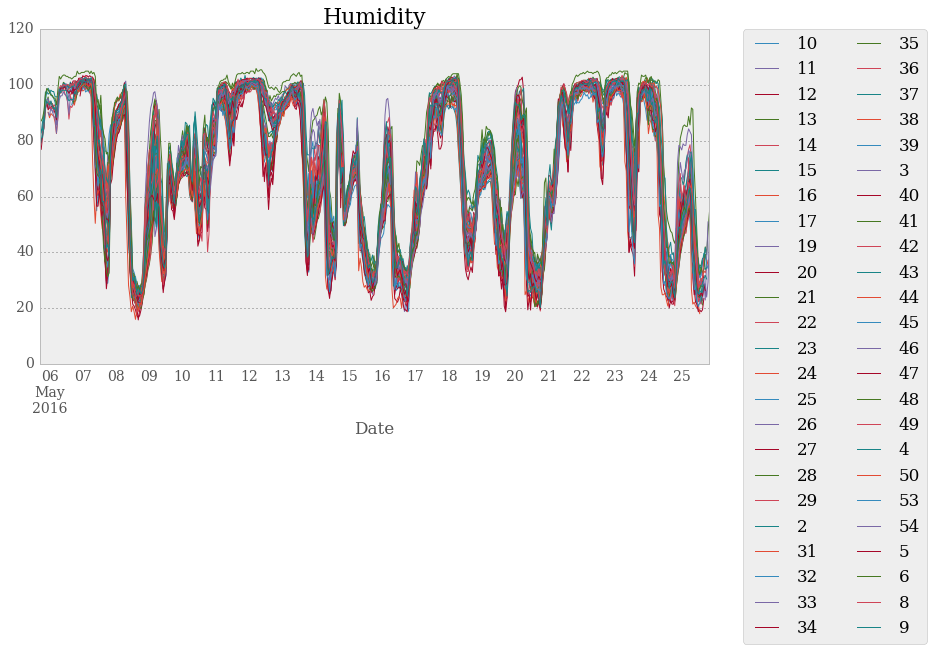

In [18]:
tempDF.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('Humidity')

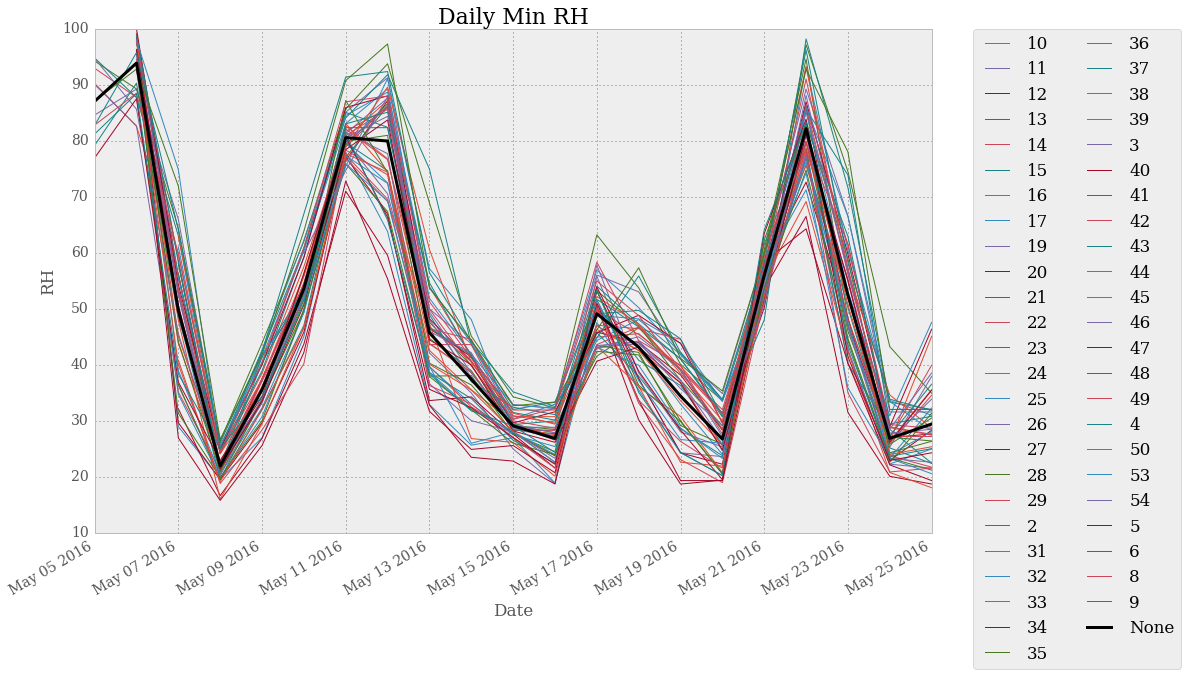

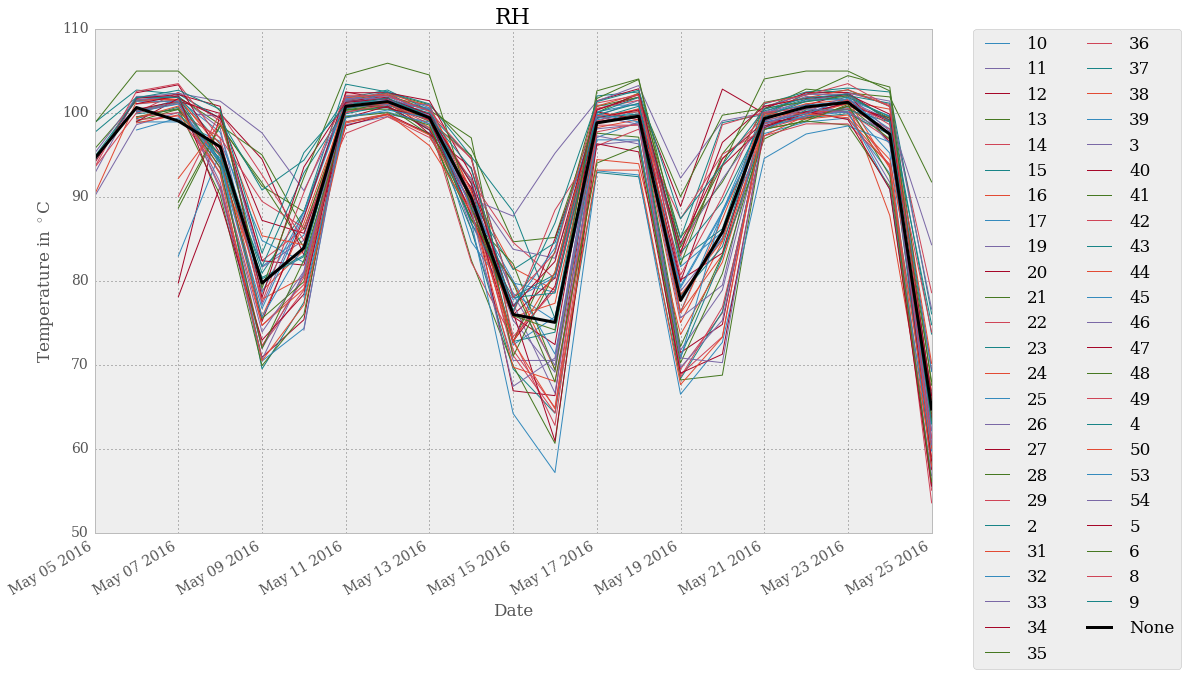

In [3]:
fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(tempDF.resample('D', how= 'min').index, tempDF.resample('D', how= 'min')[column], label= column)

tempDF.resample('D', how= 'min').mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('Daily Min RH')
plt.ylabel('RH')

fig = plt.figure(figsize=[15,10])
for column in tempDF: 
    plt.plot(tempDF.resample('D', how= 'max').index, tempDF.resample('D', how= 'max')[column], label= column)

tempDF.resample('D', how= 'max').mean(axis=1).plot(style = 'k', label = 'iButton Mean', linewidth = 3)


plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol =2)
plt.title('RH')
plt.ylabel('Temperature in $^\circ $C')

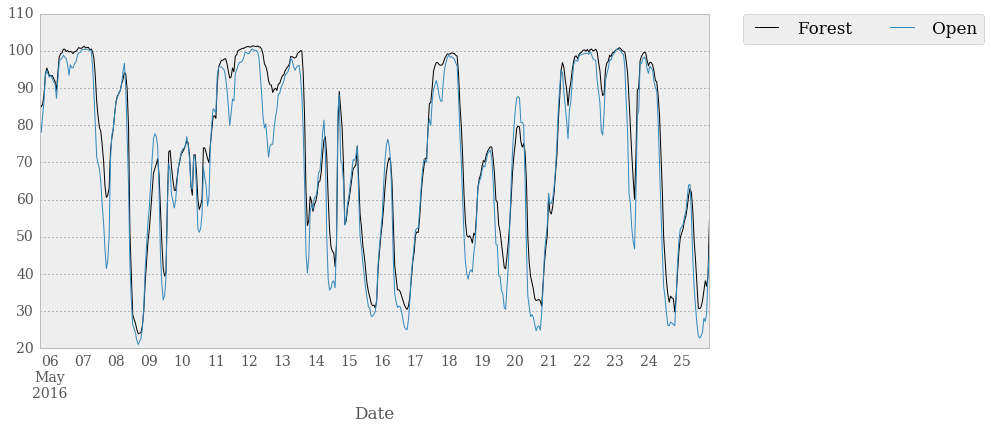

In [19]:
pylab.rcParams['figure.figsize'] = 12, 6
tempDF[forestsensors].mean(axis=1).plot(color = 'black', label = 'Forest')
tempDF[opensensors].mean(axis=1).plot(label = 'Open')
plt.legend(['Forest', 'Open'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)

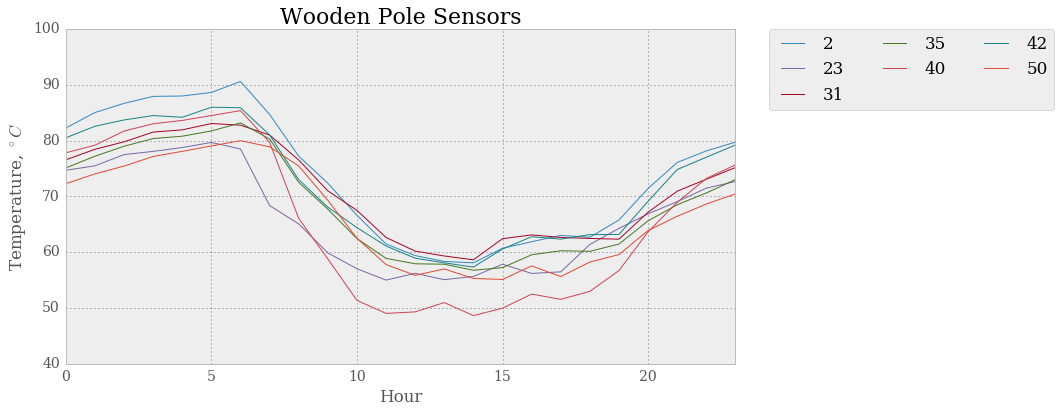

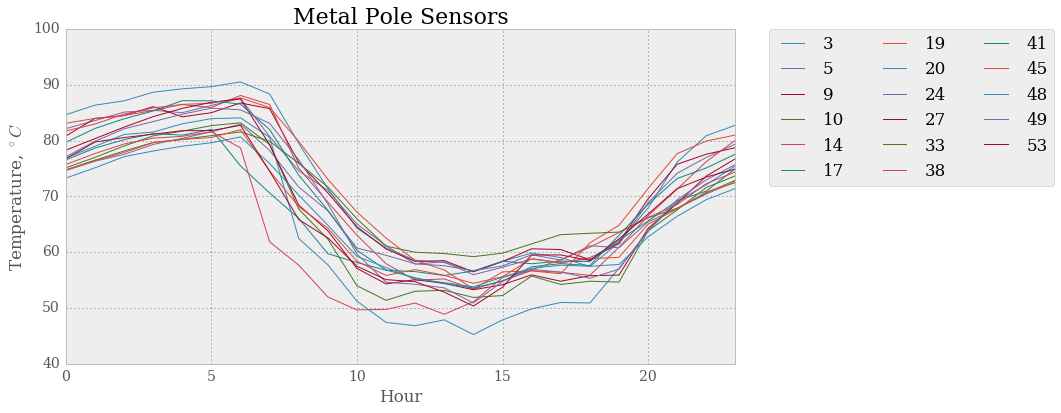

In [5]:
pylab.rcParams['figure.figsize'] = 12, 6
woodenpole = meta[meta['attachment']=='deadwood'].index
metalpole = meta[meta['attachment']=='metal'].index

tempDF[woodenpole].groupby(tempDF[woodenpole].index.hour).mean().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.xlabel('Hour')
plt.ylabel('Temperature, $^\circ C$')
plt.title('Wooden Pole Sensors')

tempDF[metalpole].groupby(tempDF[metalpole].index.hour).mean().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.xlabel('Hour')
plt.ylabel('Temperature, $^\circ C$')
plt.title('Metal Pole Sensors')


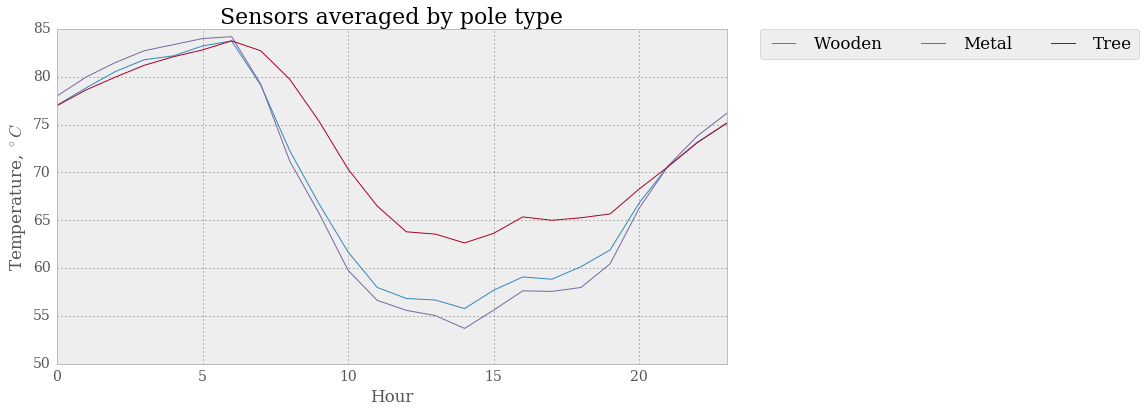

In [20]:
woodenpole = meta[meta['attachment']=='deadwood'].index
metalpole = meta[meta['attachment']=='metal'].index
tree = meta[meta['attachment']=='tree'].index
tempDF[woodenpole].groupby(tempDF[woodenpole].index.hour).mean().mean(axis=1).plot(label = 'Wooden')
tempDF[metalpole].groupby(tempDF[metalpole].index.hour).mean().mean(axis=1).plot(label = 'Metal')
tempDF[tree].groupby(tempDF[tree].index.hour).mean().mean(axis=1).plot(label = 'tree')
plt.legend(['Wooden', 'Metal', 'Tree'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.xlabel('Hour')
plt.ylabel('Temperature, $^\circ C$')
plt.title('Sensors averaged by pole type')


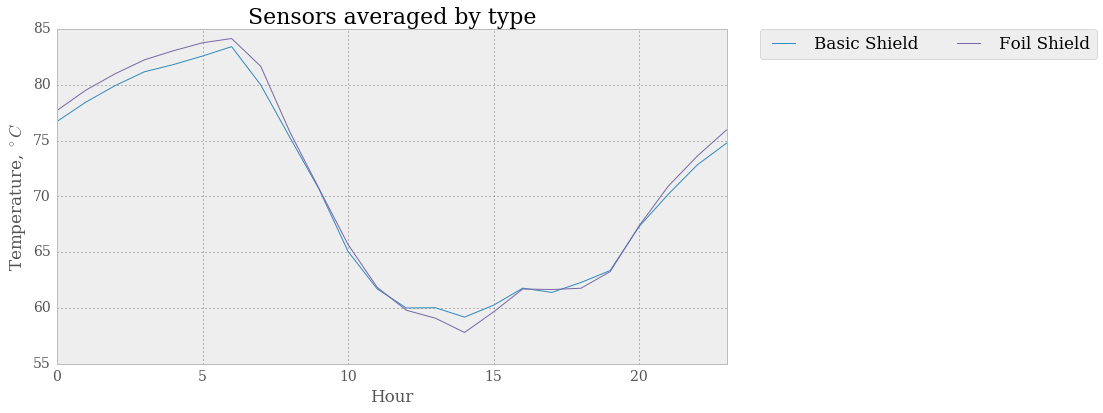

In [7]:
option1 = meta[meta['shield']=='basic'].index
option2 = meta[meta['shield']=='foil'].index

tempDF[option1].groupby(tempDF[option1].index.hour).mean().mean(axis=1).plot(label = 'Wooden')
tempDF[option2].groupby(tempDF[option2].index.hour).mean().mean(axis=1).plot(label = 'Metal')
plt.legend(['Basic Shield', 'Foil Shield'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.xlabel('Hour')
plt.ylabel('Temperature, $^\circ C$')
plt.title('Sensors averaged by type')

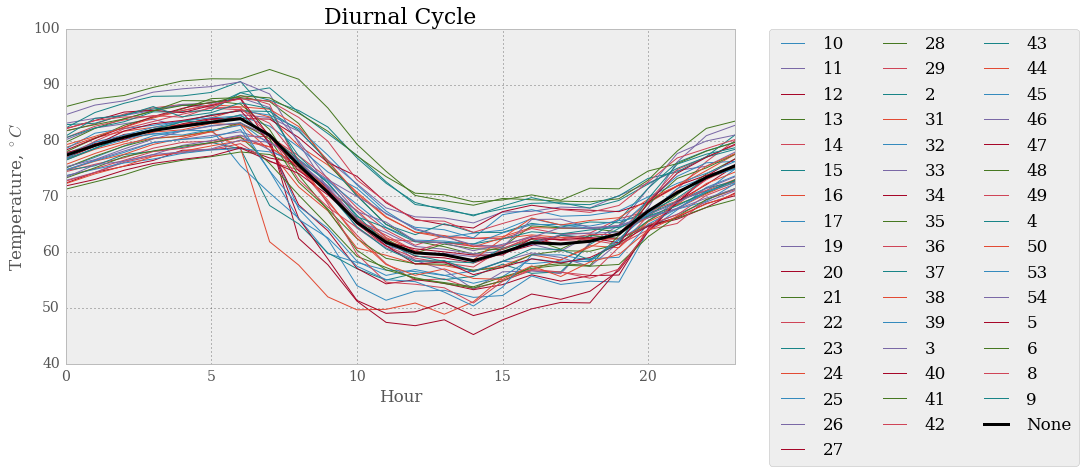

In [8]:
tempDF.groupby(tempDF.index.hour).mean().plot()
tempDF.groupby(tempDF.index.hour).mean().mean(axis=1).plot(color = 'black', linewidth = '3',label = 'mean')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.xlabel('Hour')
plt.ylabel('Temperature, $^\circ C$')
plt.title('Diurnal Cycle')

In [9]:
opensensors = meta[meta['vesacategory']== 'o'].index
forestsensors = meta[meta['vesacategory']== 'f'].index

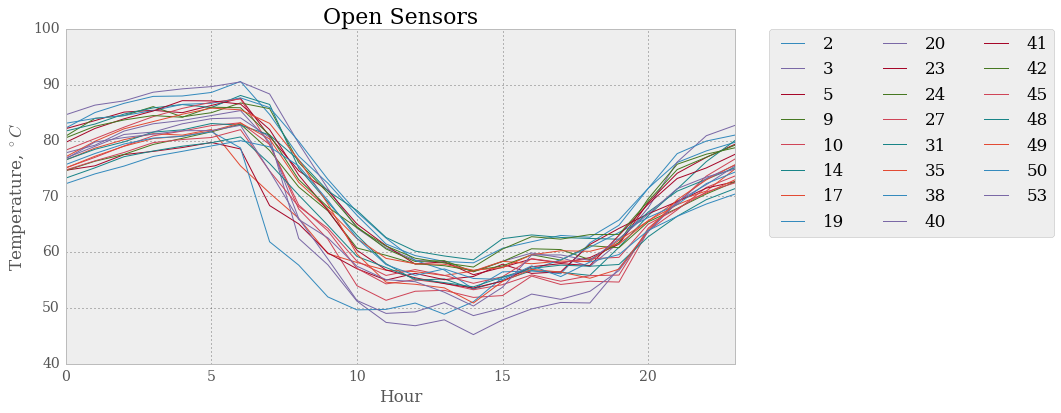

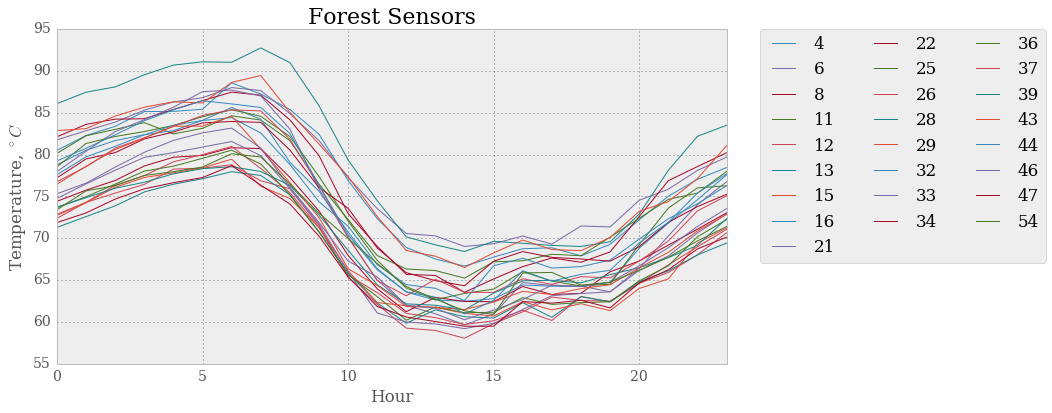

In [11]:
tempDF[opensensors].groupby(tempDF[opensensors].index.hour).mean().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.xlabel('Hour')
plt.ylabel('Temperature, $^\circ C$')
plt.title('Open Sensors')
#plt.ylim([10,24])

tempDF[forestsensors].groupby(tempDF[forestsensors].index.hour).mean().plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.xlabel('Hour')
plt.ylabel('Temperature, $^\circ C$')
plt.title('Forest Sensors')
#plt.ylim([10,24])

#tempDF[opensensors].plot()
#tempDF[forestsensors].plot()

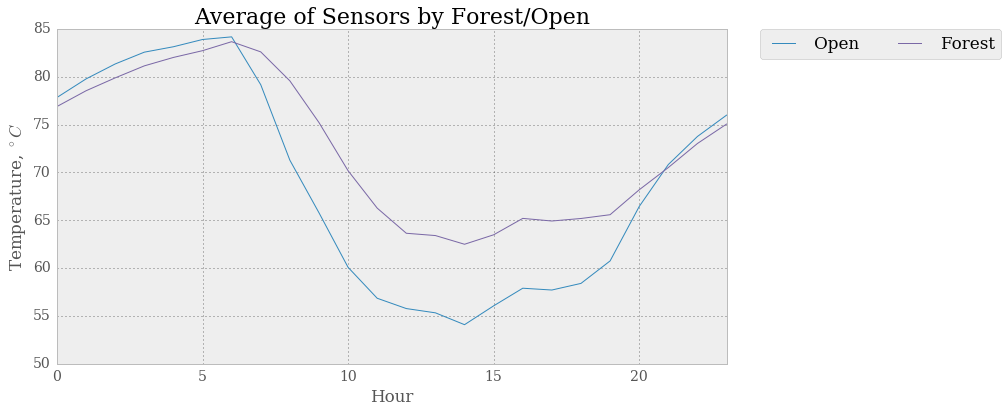

In [12]:
tempDF[opensensors].groupby(tempDF[opensensors].index.hour).mean().mean(axis=1).plot(label = 'Open')
tempDF[forestsensors].groupby(tempDF[forestsensors].index.hour).mean().mean(axis=1).plot(label = 'Forest')
plt.legend(['Open', 'Forest'],bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., ncol = 3)
plt.xlabel('Hour')
plt.ylabel('Temperature, $^\circ C$')
plt.title('Average of Sensors by Forest/Open')


In [14]:
lon = meta['location:Longitude']
lat = meta['location:Latitude']
data = tempDF.mean().values

In [62]:
lon.shape, lat.shape, data.shape

((48,), (48,), (48,))

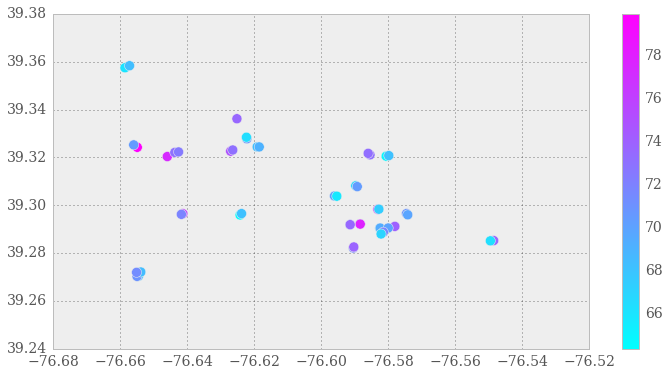

In [15]:
plt.scatter(lon, lat, s = 100, c= data, cmap = 'cool')
plt.colorbar()